# BÁO CÁO BÀI TẬP THỰC HÀNH VÀ ĐỒ ÁN CUỐI KỲ

- Dành cho lớp CS114.O21 và CS114.O21.KHCL

## THÔNG TIN NHÓM

- Mỗi SV của nhóm điền các thông tin như bên dưới

1. 22520193
  - Họ và Tên: Phan Thanh Đăng
  - Số buổi vắng: 0
  - Số bài tập quá trình:
  - Điểm WeCode: 2462

2. 22520234
  - Họ và Tên: Phùng Văn Đạt
  - Số buổi vắng:
  - Số bài tập quá trình:
  - Điểm WeCode:

3. 22520363
  - Họ và Tên: Lê Văn Giáp
  - Số buổi vắng:
  - Số bài tập quá trình:
  - Điểm Wecode:


## THÔNG TIN ĐỒ ÁN - THỰC HÀNH

Các SV cần mô tả đầy đủ, càng chi tiết càng tốt về các bài thực hành đã làm để có cơ sở tính điểm đồ án và thực hành.

1. Trang github của nhóm (đặt tên repos là mã lớp học-MSSV, ví dụ CS114.O21-MSSV): https://github.com/PTD504/CS114.O21-22520193-22520234-22520363

2. Đồ án cuối kỳ: MotocycleClassification
- Tổng số lượng ảnh đóng góp: 560.
- Phương pháp thu thập ảnh: Thu thập từ nguồn Internet, cụ thể là kết quả tìm kiếm trên Microsoft Edge và trên Pinterest.com
- Phương pháp làm sạch dữ liệu ảnh: Xử lý loại bỏ các ảnh bị trùng, loại bỏ những ảnh không hợp lệ (sai định dạng, những ảnh lỗi không mở được).
- Post một số hình ảnh của các loại ở đây.
- Phương pháp rút trích đặc trưng sử dụng: MobileNetV2
- Thuật toán học được sử dụng: LogisticRegression, Convolutional Neural Network.
- Framework, thư viện sử dụng: Keras, Tensorflow, Scikit-learn
- Kết quả Accuracy: xxx (ví dụ điền 79.25%). Xếp hạng: 15 (theo danh sách file CS114.O21-O21.KHCL.ScoreBoard.csv)

3. Danh sách các bài thực hành đã làm - điền thời điểm (ngày, giờ) nộp bài trên Classroom:
- Thống kê dữ liệu (CS114.Tool.DatasetStat.ipynb): 6/06/2024
- Tạo các splits (CS114.Tool.CreateSplit.ipynb): 10/06/2024
- Hiển thị các ảnh (CS114.Tool.DatasetViz.ipynb): 10/06/2024
- Ứng dụng Clustering (CS114.Clustering.ipynb):
- Đánh giá Model (CS114.Evaluation.ipynb):

4. Bài tập - Dự đoán điểm IT001
- Mô tả về đặc trưng, các code đã dùng để rút trích đặc trưng, kết quả rút trích lưu trữ quản lý thế nào?
- Thuật toán học, quá trình huấn luyện và thử nghiệm?

5. Bài tập - Nhận dạng chữ số viết tay
- Mô tả về dữ liệu đóng góp
- Mô tả về đặc trưng và thuật toán học

## MÔ TẢ HỖ TRỢ CỦA CÁC CÔNG CỤ NHƯ CHATGPT, GEMINI, POE

- Các SV mô tả vắn tắt việc dùng các công cụ để hỗ trợ cho việc thực hiện bài thực hành

## CODE CỦA ĐỒ ÁN MOTOCYCLECLASSIFICATION

1. Tham khảo các bước
  - https://keras.io/examples/vision/image_classification_from_scratch/

2. Các lưu ý:
  - Cần ghi rõ thông tin ngày cập nhật
  - Đoạn code của người khác nếu sử dụng lại, phải ghi tham chiếu để phân biệt đâu là code của mình, đâu là code của người khác
  - Cần phải có chú thích càng chi tiết càng tốt để code dễ đọc, dễ kiểm tra
  - Notebook nộp bài phải là notebook đã chạy và giữ lại output
  - Các hành vi gian lận sẽ bị trừng phạt rất nghiêm khắc

## CODE CHẠY CHO MỘT SPLIT

- Các cells bên dưới sẽ phục vụ cho một split
- Trước mỗi Code cell, nên có Text cell để giải thích

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
# import các thư viện
import numpy as np
import pandas as pd
import keras
from keras import layers
import keras_tuner as kt
from tensorflow import data as tf_data
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, csv, cv2, random as rd
from PIL import Image


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Các biến toàn cục
Category_map = {
  'Others': 0,
  'Honda': 1,
  'Suzuki': 2,
  'Yamaha': 3,
  'VinFast': 4
}

# thư mục gốc chứa thư mục dữ liệu
szWorkingDir = 'drive/MyDrive/CS114/Public'

# dùng để hiển thị
nNumImgsPerRow = 10
nImgHeight = nImgWidth = 150

### Bước 1 - Dataset Visualization

- Mục đích để kiểm tra xem dữ liệu có sạch, chuẩn hoá chưa

- Kết quả dự kiến <IMG SRC = 'https://editor.analyticsvidhya.com/uploads/762161_OSvbuPLy0PSM2nZ62SbtlQ.png'>

In [ ]:
def show_images(fileName):
  df = pd.read_csv(os.path.join(szWorkingDir, fileName), names=['Image_path', 'CategoryID'])

  # root = 'drive/MyDrive/CS114/Public'
  # Category_map = {'Others': 0, 'Honda': 1, 'Suzuki': 2, 'Yamaha': 3, 'VinFast': 4}

  for key, category_id in Category_map.items():
    # Select excactly numImages_per_row randomly
    images_to_show = rd.sample(df[df['CategoryID'] == category_id]['Image_path'].tolist(), nNumImgsPerRow)

    plt.figure(figsize=(20, 2))
    plt.subplot(1, nNumImgsPerRow + 1, 1)
    plt.text(0.5, 0.5, key, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 12)
    plt.axis('off')

    # Show all selected images
    for idx, image_path in enumerate(images_to_show):
      try:
        # img = mpimg.imread(os.path.join(szWorkingDir, image_path))
        img = Image.open(os.path.join(szWorkingDir, image_path))
        img = np.array(img)
      except SyntaxError as ex:
        print(f'Error: {ex}')
        print(image_path)
        continue
      img = cv2.resize(img, (nImgHeight, nImgWidth))
      plt.subplot(1, nNumImgsPerRow + 1, idx + 2)
      plt.imshow(img)
      plt.axis('off')

    plt.show()

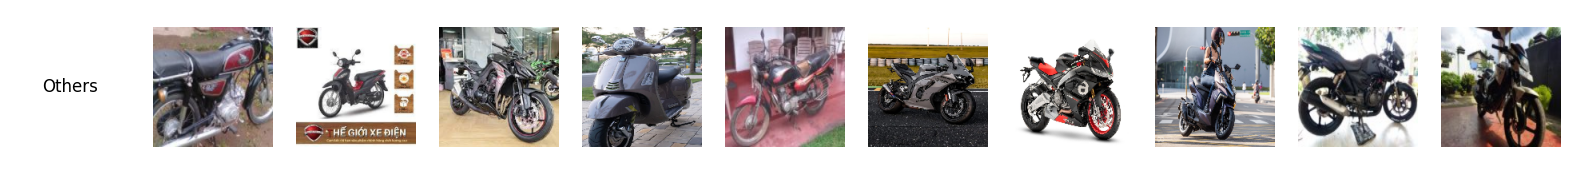

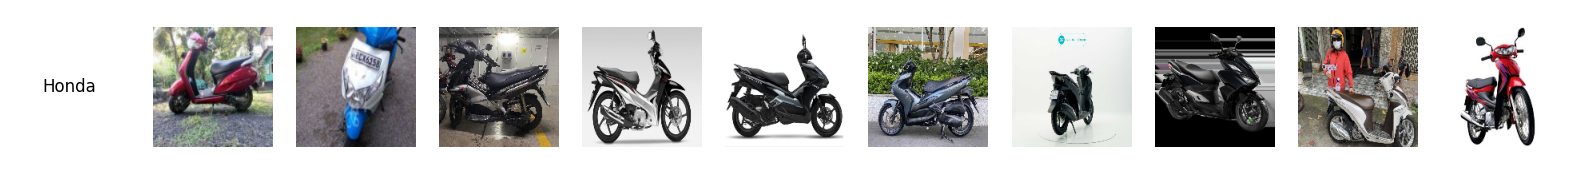

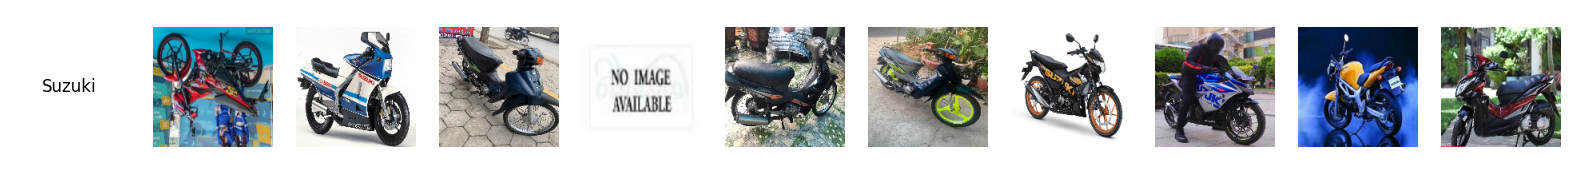

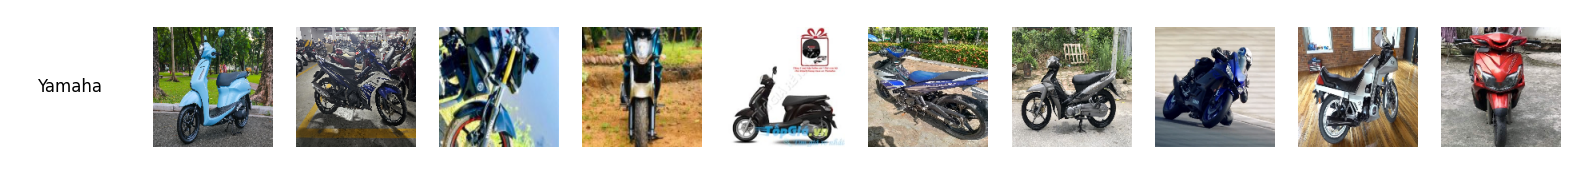

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/CS114/Public/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.3.jpeg'

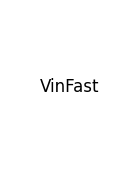

In [ ]:
# curSplit
curSplit = 1

szTrainFileName = "MotocycleDataset-Splits-{}-Train.csv".format(curSplit)
szTestFileName = "MotocycleDataset-Splits-{}-Test.csv".format(curSplit)

show_images(szTrainFileName)
# show_images(szTestFileName)

### Bước 2 - Data Augmentation

- Làm giàu dữ liệu bằng các công cụ có sẵn từ các framework như Keras



In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images


### Bước 3 - Feature Extraction

In [ ]:
# Tạo mô hình MobileNetV2 để rút trích đặc trưng
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# Rút trích đặc trưng cho tập huấn luyện và kiểm định
X_train_features = base_model.predict(X_train)
X_val_features = base_model.predict(X_val)

# Rút trích đặc trưng cho tập kiểm tra
X_test_features_list = []
for test_data in test_data:
    test_images = []
    for index, row in test_data.iterrows():
        image_path = row['image_path']
        image = load_and_preprocess_image(image_path)
        test_images.append(image)
    test_images = np.array(test_images)
    test_features = base_model.predict(test_images)
    X_test_features_list.append(test_features)


### Bước 4 - Model Configuration

- Có thể chọn Logistic Regression

### Bước 5 - Model Training

- Nên có visualize model accuracy, model loss để xem các hyperparameters có cần điều chỉnh không

### Bước 6 - Model Evaluation

- Dùng model (kết quả của bước Model Training) để predict CategoryID của các ảnh trong tập dữ liệu Test, sau đó tính Accuracy và Confusion Matrix

### Bước 7 - Submission

- Ghi kết quả ra tập tin CS114.O21-O21.KHCL.ScoreBoard.csv theo chế độ Append: https://drive.google.com/file/d/1qjGycdcIqsoag_yaVqY8UAUNmpFUkVFe/view?usp=sharing
- Quy ước:
  - Date: ví dụ 2024-06-11 10:32:19 (dùng hàm formatted_date = now.strftime("%Y-%m-%d %H:%M:%S"))
  - GroupID: các MSSV của thành viên trong nhóm cách nhau bằng dấu gạch ngang -, ví dụ 21522446-21522243
  - SplitID: giá trị từ 1 đến 5
  - Accuracy: giá trị theo quy ước dấu . phân cách phần thập phân, ví dụ 90.2345 - lấy đến 4 số thập phân
  - Desc: mô tả phương pháp, ví dụ Random. Mỗi nhóm có thể có rất nhiều trials, do đó cần phải mô tả tóm tắt về các trial để còn nhận diện
  
